In [29]:
import matplotlib.pyplot as plt
from nltk.corpus import stopwords
import numpy as np
import pandas as pd
import unicodedata
import re

from nltk.stem import SnowballStemmer
from nltk import word_tokenize

from gensim.models import Word2Vec
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

In [14]:
def strip_accents(text):

    try:
        text = unicode(text, 'utf-8')
    except NameError: # unicode is a default on python 3 
        pass

    text = unicodedata.normalize('NFD', text)\
           .encode('ascii', 'ignore')\
           .decode("utf-8")

    return str(text)

In [20]:
def clean_sentence(val):
    "remove chars that are not letters or numbers, downcase, then remove stop words"
    regex = re.compile('([^\s\w]|_)+')
    sentence = regex.sub('', val).lower()
    sentence = sentence.split(" ")
    
    for word in list(sentence):
        if word in stop_words_sp:
            sentence.remove(word)  
            
    sentence = " ".join(sentence)
    return sentence

In [37]:
def tsne_plot(model):
    "Creates and TSNE model and plots it"
    labels = []
    tokens = []

    for word in model.wv.vocab:
        tokens.append(model[word])
        labels.append(word)
    
    tsne_model = TSNE(perplexity=40, n_components=2, init='pca', n_iter=2500, random_state=23)
    new_values = tsne_model.fit_transform(tokens)

    x = []
    y = []
    for value in new_values:
        x.append(value[0])
        y.append(value[1])
        
    plt.figure(figsize=(16, 16)) 
    for i in range(len(x)):
        plt.scatter(x[i],y[i])
        plt.annotate(labels[i],
                     xy=(x[i], y[i]),
                     xytext=(5, 2),
                     textcoords='offset points',
                     ha='right',
                     va='bottom')
    plt.show()

In [2]:
ruta_data = "../data"
ruta_train = ruta_data + "/train.csv"
ruta_test = ruta_data + "/test.csv"

In [3]:
desc_train = pd.read_csv(f"{ruta_data}/descripciones_train_limpias.csv")
desc_test = pd.read_csv(f"{ruta_data}/descripciones_test_limpias.csv")

In [4]:
desc_train = desc_train.fillna("")
desc_test = desc_test.fillna("")

In [17]:
stop_words_sp = set(stopwords.words('spanish'))
aux = set()
for word in stop_words_sp:
    aux.add(strip_accents(word))
    
stop_words_sp = stop_words_sp.union(aux)

In [30]:
stemmer = SnowballStemmer('spanish')

In [39]:
model = Word2Vec([[stemmer.stem(i) for i in word_tokenize(clean_sentence(descr))] for descr in desc_train["descripcion"]], size=100)

In [57]:
descripcion = desc_train["descripcion"].apply(lambda x: "".join([stemmer.stem(word) for word in word_tokenize(x)]))
# LIMPIAR ANTES!    

KeyboardInterrupt: 

In [40]:
X = model[model.wv.vocab]

pca = PCA(n_components=2)

result = pca.fit_transform(X)

/usr/lib/python3.7/site-packages/ipykernel_launcher.py:1: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  """Entry point for launching an IPython kernel.


/usr/lib/python3.7/site-packages/ipykernel_launcher.py:7: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  import sys


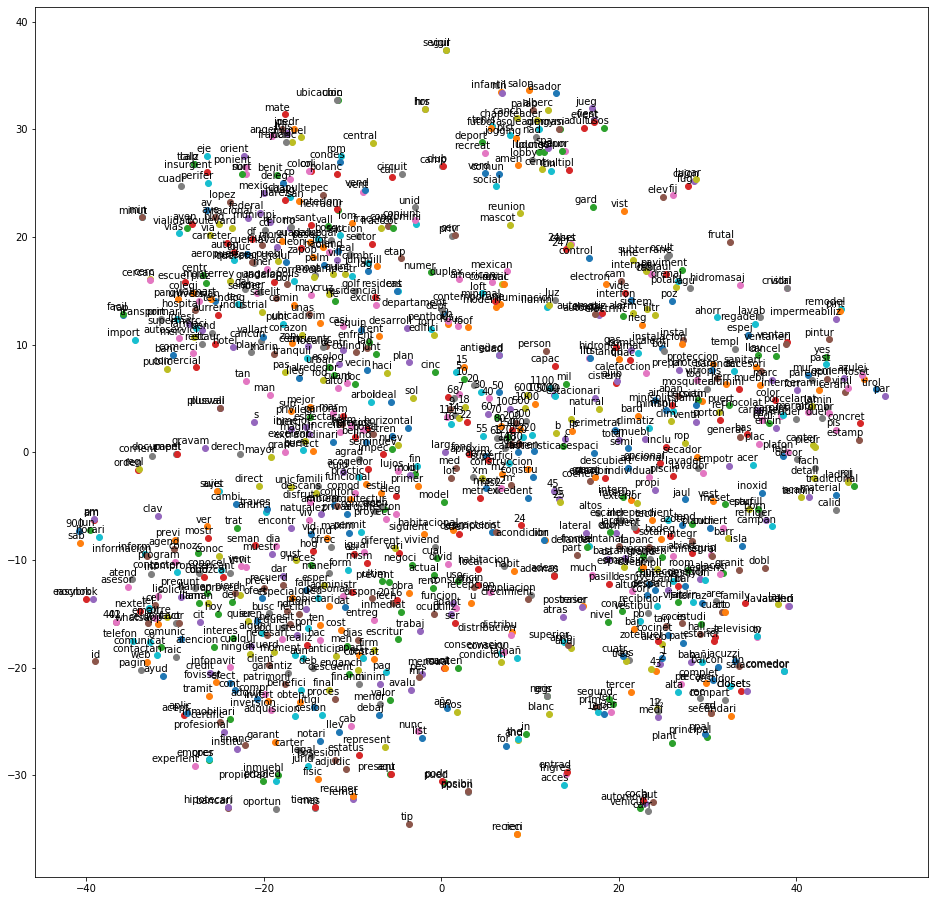

In [41]:
tsne_plot(model)

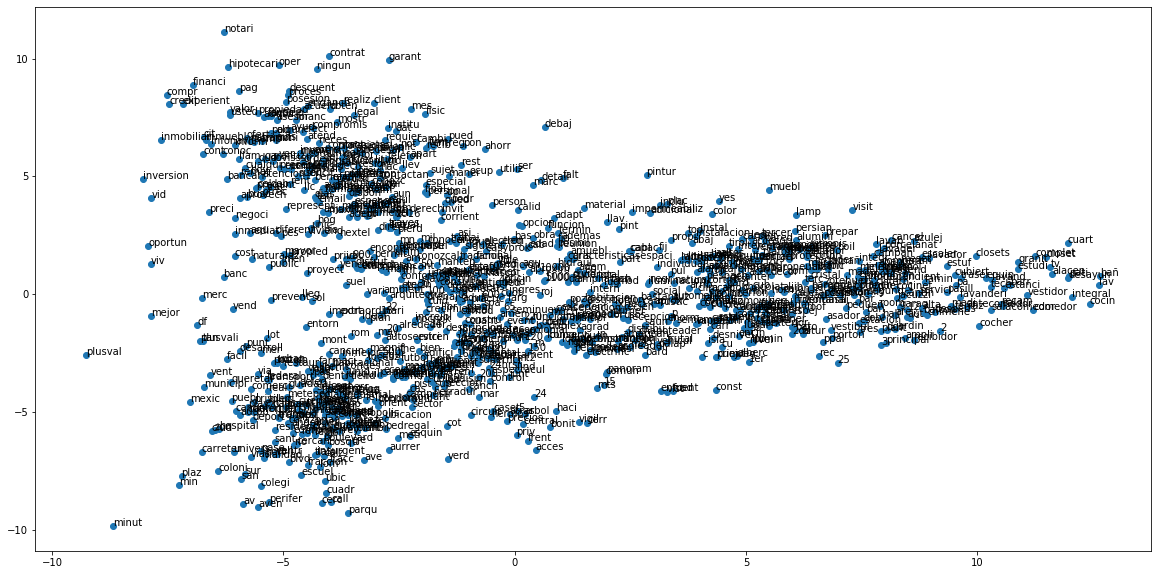

In [42]:
plt.figure(figsize=(20,10))
plt.scatter(result[:, 0], result[:, 1])
words = list(model.wv.vocab)
for i, word in enumerate(words):
    if "$" in word or word in stop_words_sp:
        continue
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))
plt.show()

In [43]:
len(words)

971